In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import example_utils as ex_utils

import MARBLE
from MARBLE import plotting, dynamics, geometry


np.random.seed(42)

In [2]:
def get_pos_vel(mus, alpha=0.05):
    X0_range = dynamics.initial_conditions(n, len(mus), area)

    pos, vel = [], []
    for X0, m in zip(X0_range, mus):
        p, v = dynamics.simulate_vanderpol(m, X0, t)
        pos.append(np.vstack(p))
        vel.append(np.vstack(v))

    pos, vel = dynamics.embed_parabola(pos, vel, alpha=alpha)
    return pos, vel

# Generate phase portraits from random initial conditions while varying $\beta_1$

In [3]:
n_mus = 51
t = np.arange(0, 3, 0.5)
n = 100
area = [[-3, -3],[3, 3]]

mus = np.linspace(-1.0, 1.0, n_mus)
pos, vel = get_pos_vel(mus)

/Users/arnaudon/base/lib/python3.10/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


10000


/Users/arnaudon/code/MARBLE/MARBLE/dynamics.py:22: RuntimeWarning: overflow encountered in double_scalars
  f2 = par["mu"] * (1 - x**2) * y - x
/Users/arnaudon/code/MARBLE/MARBLE/dynamics.py:22: RuntimeWarning: invalid value encountered in double_scalars
  f2 = par["mu"] * (1 - x**2) * y - x


 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2580317095227D+01   r2 =  0.2048487852821D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2580317095227D+01   r2 =  0.2048487852821D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2580317095227D+01   r2 =  0.2048487852821D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2580317095227D+01   r2 =  0.2048487852821D-15
 lsoda--  warning..internal t (=r1) 

(-5.0, 5.0)

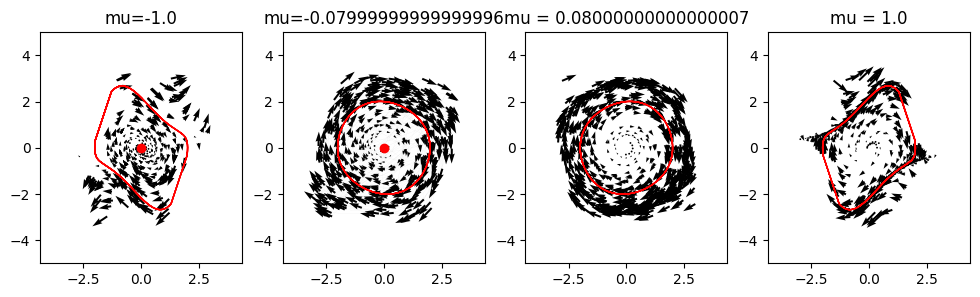

In [4]:
# simulate some long trajectories to plot attractor
t_long = np.arange(0, 100, 0.01)
print(len(t_long))
X0 = dynamics.initial_conditions(1, len(mus), area)
p_long, v_long = [], []
for X0, m in zip(X0, mus):
    p, v = dynamics.simulate_vanderpol(m, X0, t_long)
    p_long.append(p[0][-2000:])
    v_long.append(v[0][-2000:])

# plot trajectories and attractor
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
plotting.plot_phase_portrait(pos[0][:, :2], 0.05*vel[0][:, :2], ax[0], lw=.01, style='>')
ax[0].scatter(0, 0, c='r', zorder=10)
ax[0].plot(-p_long[-1][:, 0], p_long[-1][:, 1], '-', c='r', lw=1, zorder=10)
ax[0].axis('equal')
ax[0].set_title(f"mu={mus[0]}")
ax[0].set_xlim(-5, 5)
ax[0].set_ylim(-5, 5)


plotting.plot_phase_portrait(pos[n_mus//2-2][:, :2], 0.05*vel[n_mus//2-2][:, :2], ax[1], lw=.01, style='->')
ax[1].scatter(0, 0, c='r', zorder=10)
ax[1].plot(-p_long[n_mus//2+2][:, 0], p_long[n_mus//2+2][:, 1], c='r', lw=1, zorder=10)
ax[1].axis('equal')
ax[1].set_title(f"mu={mus[n_mus//2-2]}")
ax[1].set_xlim(-5, 5)
ax[1].set_ylim(-5, 5)

plotting.plot_phase_portrait(pos[n_mus//2+2][:, :2], 0.05*vel[n_mus//2+2][:, :2], ax[2], lw=.01, style='>')
ax[2].plot(p_long[n_mus//2+2][:, 0], p_long[n_mus//2+2][:, 1], c='r', lw=1, zorder=10)
ax[2].axis('equal')
ax[2].set_title(f"mu = {mus[n_mus//2+2]}")
ax[2].set_xlim(-5, 5)
ax[2].set_ylim(-5, 5)

plotting.plot_phase_portrait(pos[-1][:, :2], 0.05*vel[-1][:, :2], ax[3],  lw=.01, style='>')
ax[3].plot(p_long[-1][:, 0], p_long[-1][:, 1], '-', c='r', lw=1, zorder=10)
ax[3].axis('equal')
ax[3].set_title(f"mu = {mus[-1]}")
ax[3].set_xlim(-5, 5)
ax[3].set_ylim(-5, 5)

# Run MARBLE

In [6]:
data = MARBLE.construct_dataset(pos, features=vel, graph_type='cknn', k=20, stop_crit=0.03, vector=False)

params = {'epochs': 50, #optimisation epochs
       'order': 2, #order of derivatives
       'hidden_channels': 32, #number of internal dimensions in MLP
       'out_channels': 5,
       'inner_product_features': True,
      }

model = MARBLE.net(data, params=params)
model.run_training(data)

---- Embedding dimension: 3
---- Signal dimension: 3

Vector computations are disabled

---- Computing kernels ... Done 
---- Computing eigendecomposition ... Done 

---- Settings: 

epochs : 50
order : 2
hidden_channels : 32
out_channels : 5
inner_product_features : True
batch_size : 64
lr : 0.01
momentum : 0.9
diffusion : False
include_positions : False
frac_sampled_nb : -1
dropout : 0.0
n_lin_layers : 2
bias : True
vec_norm : False
batch_norm : None
seed : 0
processes : 1
dim_signal : 3
dim_emb : 3
n_sampled_nb : -1

---- Number of features to pass to the MLP:  13
---- Total number of parameters:  731

---- Training network ...

Epoch: 1, Training loss: 1.359573, Validation loss: 1.2892, lr: 0.0100 *
Epoch: 3, Training loss: 1.220573, Validation loss: 1.1883, lr: 0.0100 *
Epoch: 6, Training loss: 1.137820, Validation loss: 1.1521, lr: 0.0100 *
Epoch: 10, Training loss: 1.120537, Validation loss: 1.1310, lr: 0.0100 *
Epoch: 15, Training loss: 1.102802, Validation loss: 1.0915, lr: 0.

Performed umap embedding on embedded results.
Performed umap embedding on embedded results.


<Axes: >

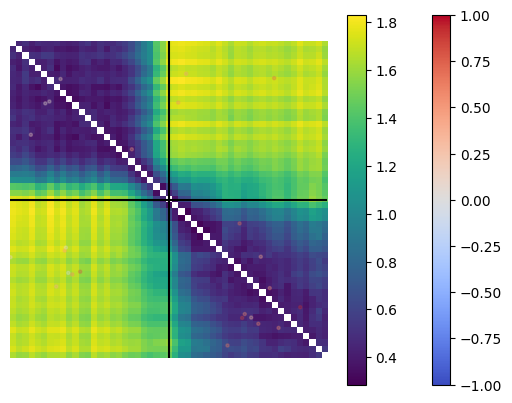

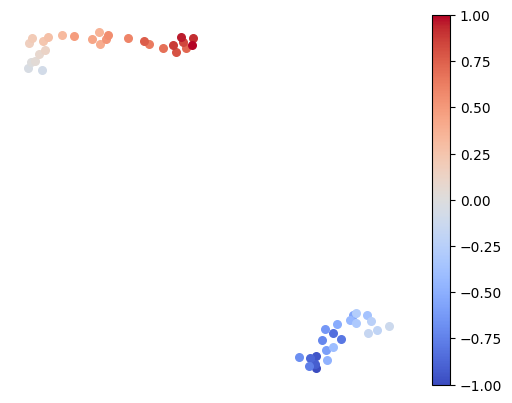

In [7]:
data = model.evaluate(data)
data = MARBLE.cluster_embeddings(data)

plotting.embedding(data, mus[data.y.numpy().astype(int)])

d= data.dist.copy()
d += np.diag(np.diag(d) *np.nan)
im = plt.imshow(d, extent=[mus[0], mus[-1], mus[0], mus[-1]])
plt.axhline(0, c='k')
plt.axvline(0, c='k')

plt.colorbar(im)

emb_MDS, _ = geometry.embed(data.dist)
plotting.embedding(emb_MDS, mus, s=30, alpha=1)

# Zoom on mu=0

In [ ]:
mus = np.linspace(-0.1, 0.1, n_mus)
pos, vel = get_pos_vel(mus)

data = MARBLE.construct_dataset(pos, features=vel, graph_type='cknn', k=20, stop_crit=0.03, vector=False)
model = MARBLE.net(data, params=params)
model.run_training(data)

In [ ]:
data = model.evaluate(data)
data = MARBLE.cluster_embeddings(data)

plotting.embedding(data, mus[data.y.numpy().astype(int)])

d= data.dist.copy()
d += np.diag(np.diag(d) *np.nan)
im = plt.imshow(d, extent=[mus[0], mus[-1], mus[0], mus[-1]])
plt.axhline(0, c='k')
plt.axvline(0, c='k')

plt.colorbar(im)

emb_MDS, _ = geometry.embed(data.dist)
plotting.embedding(emb_MDS, mus, s=30, alpha=1)